In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [8]:
# Read Inputs

X = []
file = open('train.txt')

while(True):
    bit = file.read(1)
    if not bit:
        break
    else:
        X.append(int(bit))

file.close()

In [9]:
class ChannelEqualizer:
    def __init__(self, hk, hk_1, varience):
        self.hk = hk
        self.hk_1 = hk_1
        self.varience = varience
        self.num_of_states = 4
        self.num_of_transitions = 2 
        
        # defining states
        self.mean = {}
        self.transition = {}
        self.transition_probability = {}
        self.count = {}
        
        for i in range(self.num_of_states):
            self.mean[i] = {}
            self.transition[i] = {}
            self.transition_probability[i] = {}
            self.count[i] = {}
        
        self.transition[0][0] = 0
        self.transition[0][1] = 2
        self.transition[1][0] = 0
        self.transition[1][1] = 2
        self.transition[2][0] = 1
        self.transition[2][1] = 3
        self.transition[3][0] = 1
        self.transition[3][1] = 3
        
        for i in range(self.num_of_states):
            for j in range(self.num_of_transitions):
                self.mean[i][j] = np.array([0,0])
                self.transition_probability[i][j] = 0
                self.count[i][j] = 0
    
    def channel_out(self,ik,ik_1):
        return self.hk*ik + self.hk_1*ik_1 + np.random.normal(0,self.varience)
    
    def train_model(self,X):
        
        ik_1 = 0
        ik_2 = 0
        xk_1 = self.channel_out(ik_1,ik_2)
        
        total = 0 
        
        for ik in X:
            xk =  self.channel_out(ik,ik_1)
            cluster = [xk,xk_1]
            state = ik_1*(pow(2,1)) + ik_2*(pow(2,0))
            
            ik_2 = ik_1
            ik_1 = ik
            xk_1 = xk
            
            self.mean[state][ik] = np.add(self.mean[state][ik],cluster)
            self.count[state][ik] += 1
            
            total += 1
        
        for i in range(self.num_of_states):
            for j in range(self.num_of_transitions):
                self.transition_probability[i][j] = self.count[i][j]/(total)
                self.mean[i][j] = np.divide(self.mean[i][j],self.count[i][j])
        
        return

    def plot_mean(self):
        for i in range(self.num_of_states):
            for j in range(self.num_of_transitions):
                plt.scatter(model.mean[i][j][0],model.mean[i][j][1])
                

In [10]:
model = ChannelEqualizer(.5,1,.25)

In [11]:
model.train_model(X)

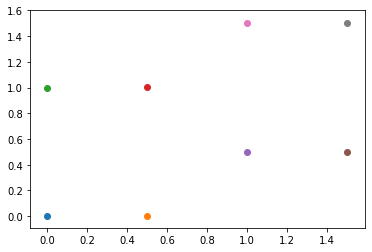

In [12]:
model.plot_mean()